In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_table = pd.merge(ride_df, city_df, on="city", how="left")
merged_table

# Display the data table for preview
merged_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

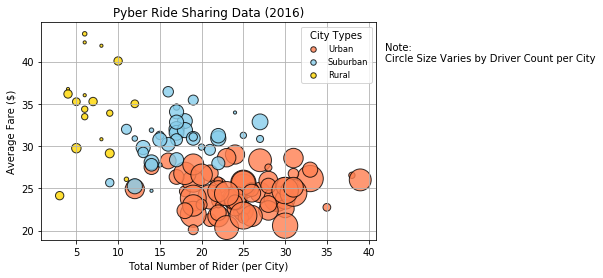

In [30]:
urb_df=merged_table.loc[merged_table["type"]=="Urban"]
sub_df=merged_table.loc[merged_table["type"]=="Suburban"]
rur_df=merged_table.loc[merged_table["type"]=="Rural"]

urb_ride_count = urb_df.groupby(["city"]).count()['ride_id']
urb_avg_fare= urb_df.groupby(["city"]).mean()['fare']
urb_driver_count= urb_df.groupby(["city"]).mean()['driver_count']

sub_ride_count = sub_df.groupby(["city"]).count()['ride_id']
sub_avg_fare= sub_df.groupby(["city"]).mean()['fare']
sub_driver_count= sub_df.groupby(["city"]).mean()['driver_count']

rur_ride_count = rur_df.groupby(["city"]).count()['ride_id']
rur_avg_fare=rur_df.groupby(["city"]).mean()['fare']
rur_driver_count= rur_df.groupby(["city"]).mean()['driver_count']

plt.scatter(urb_ride_count,
           urb_avg_fare,
           s=10*urb_driver_count, c="coral",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Urban")
plt.scatter(sub_ride_count,
           sub_avg_fare,
           s=10*sub_driver_count, c="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Suburban")
plt.scatter(rur_ride_count,
           rur_avg_fare,
           s=10*rur_driver_count, c="gold",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")

plt.grid(True)
plt.text(42, 40, "Note: \nCircle Size Varies by Driver Count per City")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rider (per City)")
plt.ylabel("Average Fare ($)")

lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig('Images/Pyber Ride Sharing Data.png')

## Total Fares by City Type

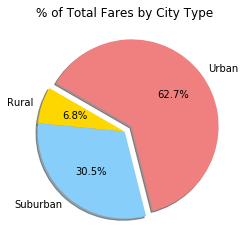

In [31]:
city_type_df = merged_table.groupby(["type"]).sum()['fare']

plt.pie(city_type_df,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

plt.savefig('Images/Total Fares by City Type.png')

## Total Rides by City Type

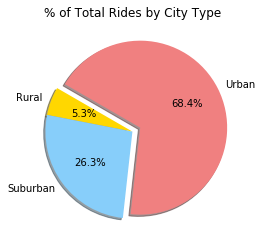

In [32]:
rides_type_df = merged_table.groupby(["type"]).count()["ride_id"]

plt.pie(rides_type_df,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

plt.savefig('Images/Total Rides by City Type.png')

## Total Drivers by City Type

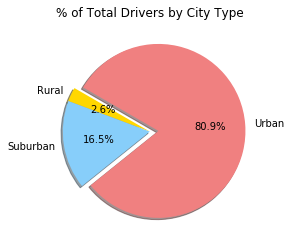

In [33]:
driver_city_df = city_df.groupby(["type"]).sum()['driver_count']

plt.pie(driver_city_df,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

plt.savefig('Images/Total Drivers by City Type.png')